In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import lzma
import re
from math import ceil

pd.options.display.max_colwidth = 100
pd.options.display.max_rows = 1000
#plt.style.use('ggplot')
plt.style.use('seaborn-paper')
mpl.rcParams['axes.linewidth'] = 0.7

In [2]:
def get_path(path):
    return re.search("(/[^/]+){2}$", path)[0][1:]

In [3]:
file = "latest_results.json.xz"

data = None
if file.endswith('.xz'): file = lzma.open(file, 'rt')
data = pd.read_json(file)
data = data.sort_values(['file', 'mode'])

short_paths = data['file'].map( get_path )
data.update( short_paths )

In [4]:
succeeded = data[data.status == 'ok'][['file', 'mode', 'time_viper', 'time_viper_axiom_gen', 'inductions', 'induction_depth', 'candidates', 'added_axioms', 'quantified', 'atomic']]

In [5]:
len(succeeded)

586

In [6]:
states = set(data.status.values)
status_colors = {}
for s in states:
    if s == 'ok':
        c = 'green'
    elif s == 'cutintro_uncompressible':
        c = 'yellow'
    elif s == 'cutintro_termset_trivial':
        c = 'gold'
    elif 'timeout' in s:
        c = plt.cm.Blues(hash(s)/2**65+0.5)
    elif s.endswith('exception'):
        c = plt.cm.Reds(hash(s)/2**65+0.5)
    else:
        c = plt.cm.Greys(hash(s)/2**65+0.5)
    status_colors[s] = c

def plot_status(d, legend=True, **kwargs):
    plt.axis('equal')
    d.plot(kind='pie', autopct='%1.1f%%',
                        colors=[status_colors[s] for s in d.index], **kwargs) \
        .set_ylabel('')
    if legend: plt.legend(d.index, loc='center left', bbox_to_anchor=(1, 0.5))

In [7]:
data_by_mode = data.groupby('mode')
modes = set( data['mode'].values )

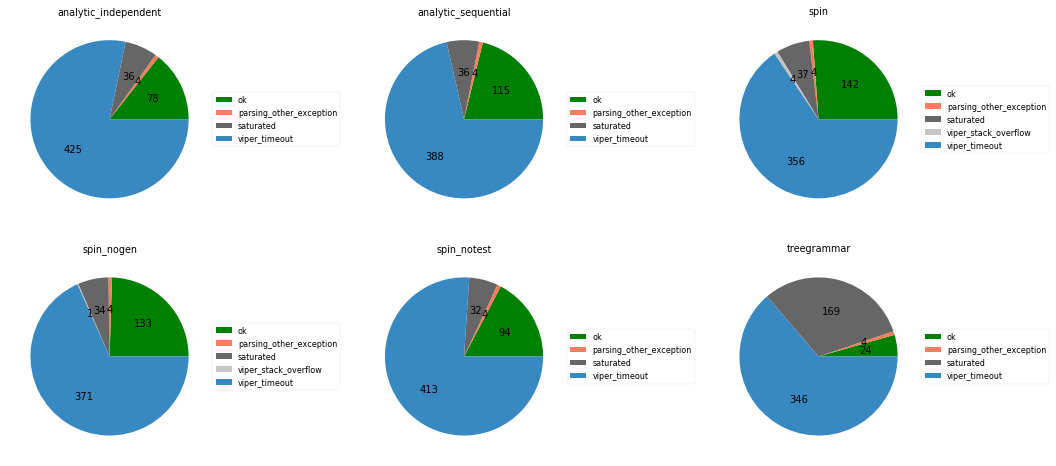

In [8]:
cols = int(ceil(len(modes) / 2))
fig, ax = plt.subplots(nrows = 2, ncols = cols, figsize = (18, 8))

for (i, mode) in enumerate( sorted( modes ) ):
    data_mode = data[data['mode'] == mode]
    p = ax[int(i / cols)][int(i % cols)]
    d = data_mode.groupby('status').size()
    total = sum(d)
    p.pie(d, autopct=lambda p: '{:.0f}'.format(p * total / 100), colors=[status_colors[s] for s in d.index])
    p.legend(d.index, loc='center left', bbox_to_anchor=(1, 0.5))
    p.set_title( mode )

In [9]:
succeeded.groupby('mode').size()

mode
analytic_independent     78
analytic_sequential     115
spin                    142
spin_nogen              133
spin_notest              94
treegrammar              24
dtype: int64

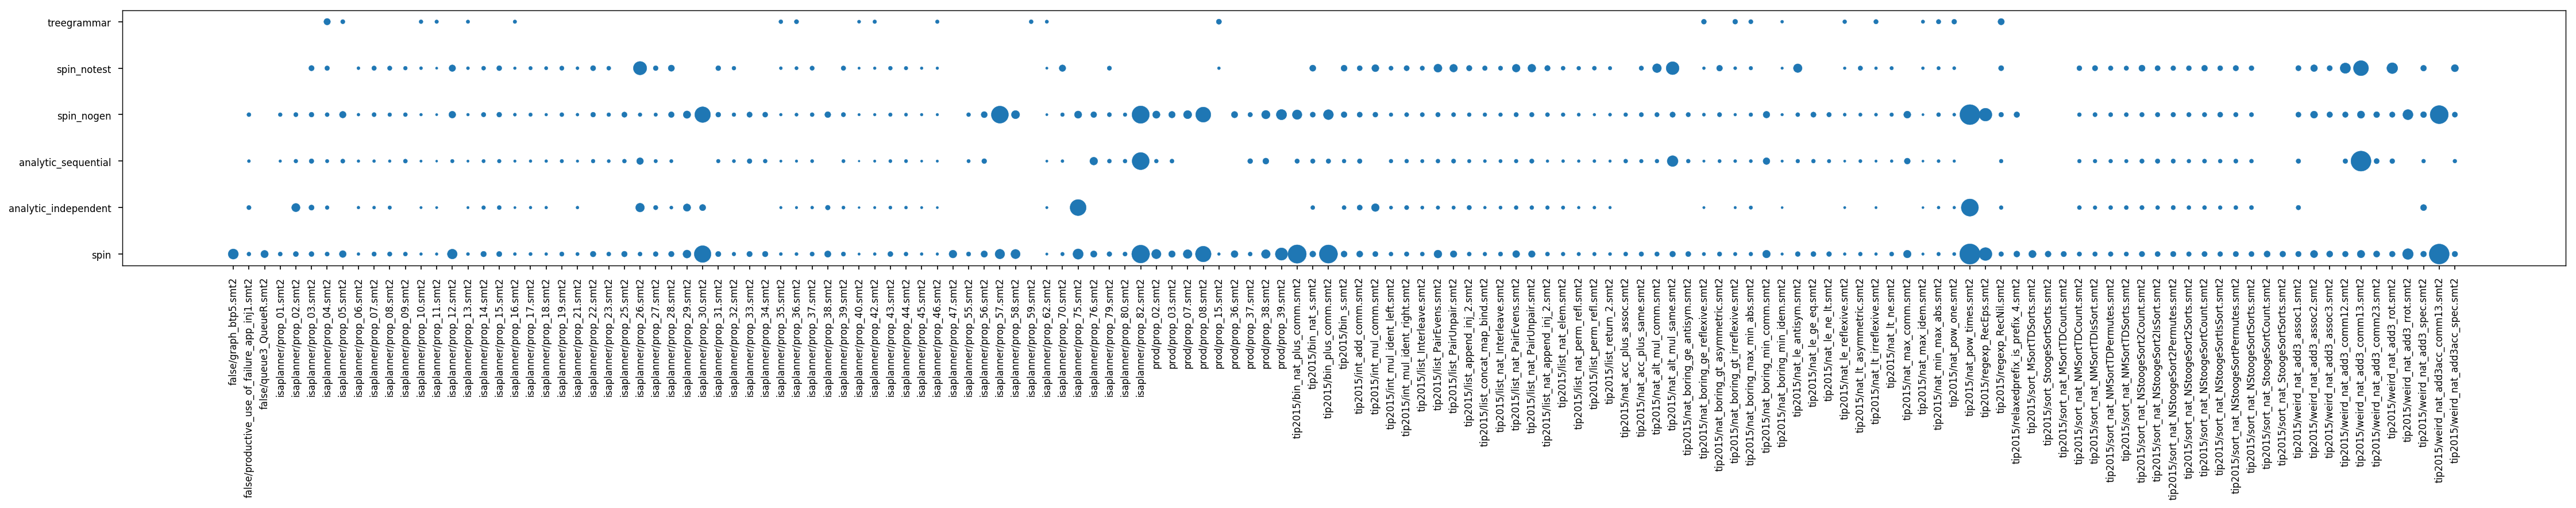

In [10]:
plt.figure( figsize=(30, 6), dpi=150 )
plt.xticks(rotation=90)
plt.scatter( succeeded['file'], succeeded['mode'], s=succeeded['time_viper'] / 400 )
plt.tight_layout()
# plt.savefig( "scatter.png" )

In [11]:
spin_success = succeeded[succeeded['mode'] == 'spin']
spin_files = set(spin_success.T.loc['file'])

Not solved by Spin:

In [12]:
for mode in sorted( modes ):
    succ = succeeded[succeeded['mode'] == mode]
    files = set(succ.T.loc['file'])
    diff = files - spin_files
    print( mode + ": " + str( diff ) )

analytic_independent: set()
analytic_sequential: set()
spin: set()
spin_nogen: set()
spin_notest: set()
treegrammar: {'isaplanner/prop_59.smt2'}


Solved by Spin, but not the other:

In [13]:
for mode in sorted( modes ):
    succ = succeeded[succeeded['mode'] == mode]
    files = set(succ.T.loc['file'])
    diff = spin_files - files
    print( mode + ": " )
    for file in sorted( diff ):
        print( "\t" + file )
    print()

analytic_independent: 
	false/graph_btp5.smt2
	false/queue3_QueueR.smt2
	isaplanner/prop_01.smt2
	isaplanner/prop_05.smt2
	isaplanner/prop_09.smt2
	isaplanner/prop_12.smt2
	isaplanner/prop_19.smt2
	isaplanner/prop_22.smt2
	isaplanner/prop_23.smt2
	isaplanner/prop_25.smt2
	isaplanner/prop_31.smt2
	isaplanner/prop_32.smt2
	isaplanner/prop_33.smt2
	isaplanner/prop_34.smt2
	isaplanner/prop_47.smt2
	isaplanner/prop_55.smt2
	isaplanner/prop_56.smt2
	isaplanner/prop_57.smt2
	isaplanner/prop_58.smt2
	isaplanner/prop_70.smt2
	isaplanner/prop_76.smt2
	isaplanner/prop_79.smt2
	isaplanner/prop_80.smt2
	isaplanner/prop_82.smt2
	prod/prop_02.smt2
	prod/prop_03.smt2
	prod/prop_07.smt2
	prod/prop_08.smt2
	prod/prop_15.smt2
	prod/prop_36.smt2
	prod/prop_37.smt2
	prod/prop_38.smt2
	prod/prop_39.smt2
	tip2015/bin_nat_plus_comm.smt2
	tip2015/bin_plus_comm.smt2
	tip2015/nat_acc_plus_assoc.smt2
	tip2015/nat_acc_plus_same.smt2
	tip2015/nat_alt_mul_comm.smt2
	tip2015/nat_alt_mul_same.smt2
	tip2015/nat_boring_

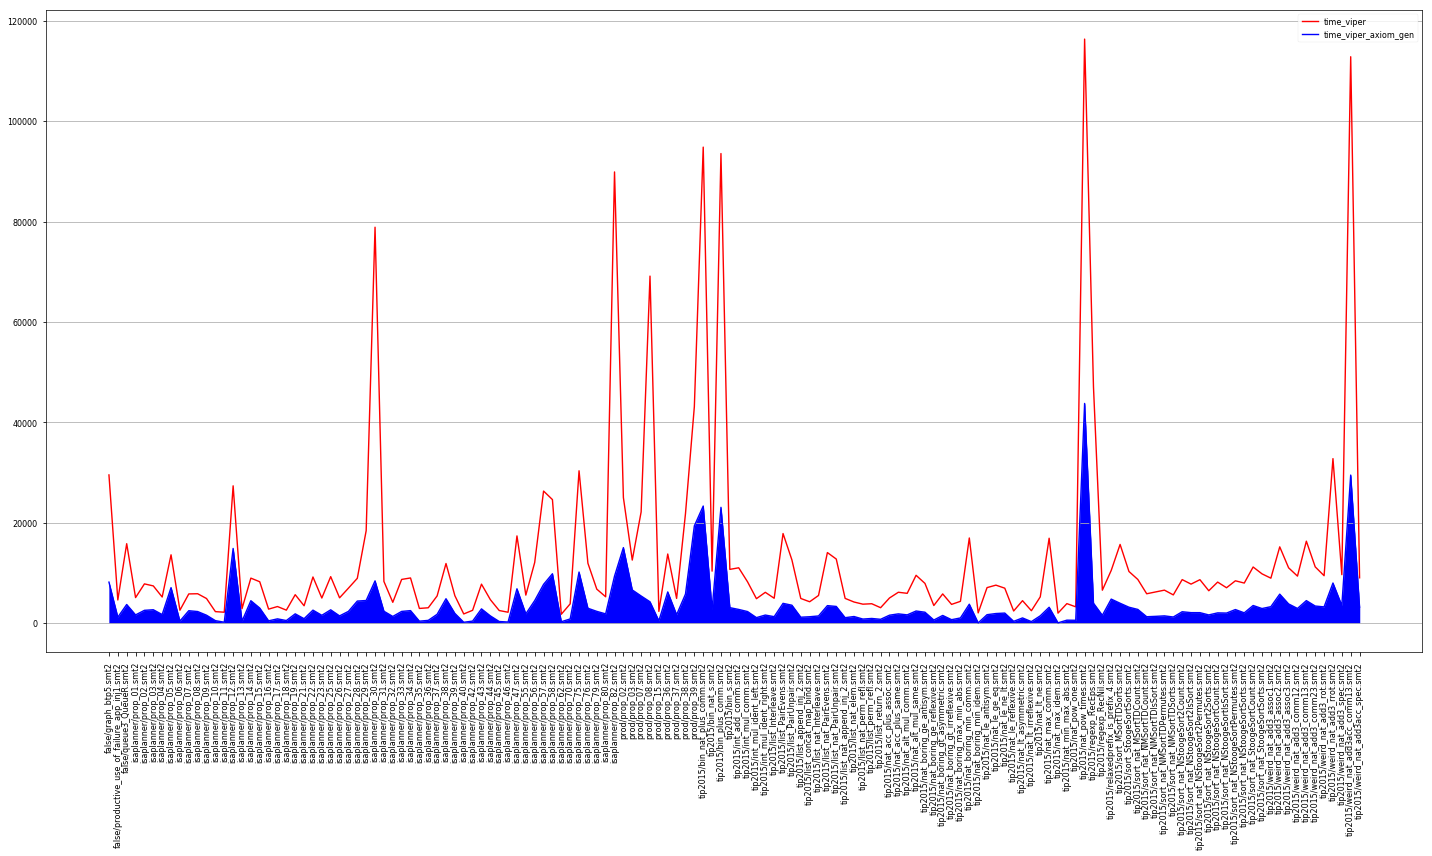

In [14]:
plt.figure( figsize=(20, 12) )
plt.grid( axis='y' )
plt.plot( spin_success['file'], spin_success['time_viper'], color='r' )
plt.plot( spin_success['file'], spin_success['time_viper_axiom_gen'], color='b' )
plt.fill_between( spin_success['file'], spin_success['time_viper_axiom_gen'], color='b' )
plt.legend()
plt.xticks( rotation = 90 )
plt.tight_layout()

In [15]:
pivot = succeeded.pivot_table( index=['file'], columns=['mode'] )
pivot

added_axioms             \
mode                                                  spin spin_nogen   
file                                                                    
false/graph_btp5.smt2                                  9.0        NaN   
false/productive_use_of_failure_app_inj1.smt2          0.0        0.0   
false/queue3_QueueR.smt2                               9.0        NaN   
isaplanner/prop_01.smt2                                2.0        2.0   
isaplanner/prop_02.smt2                                4.0        4.0   
isaplanner/prop_03.smt2                                6.0        6.0   
isaplanner/prop_04.smt2                                4.0        4.0   
isaplanner/prop_05.smt2                               22.0       22.0   
isaplanner/prop_06.smt2                                0.0        0.0   
isaplanner/prop_07.smt2                                6.0        6.0   
isaplanner/prop_08.smt2                                2.0        2.0   
isaplanner/prop_09.smt2                                1.0        1.0   
isaplanner/prop_10.smt2                                0.0        0.0   
isaplanner/prop_11.smt2                                0.0        0.0   
isaplanner/prop_12.smt2                               34.0       25.0   
isaplanner/prop_13.smt2                                0.0        0.0   
isaplanner/prop_14.smt2                                3.0        3.0   
isaplanner/prop_15.smt2                                8.0        8.0   
isaplanner/prop_16.smt2                                0.0        0.0   
isaplanner/prop_17.smt2                                0.0        0.0   
isaplanner/prop_18.smt2                                1.0        1.0   
isaplanner/prop_19.smt2                                2.0        2.0   
isaplanner/prop_21.smt2                                1.0        1.0   
isaplanner/prop_22.smt2                                4.0        4.0   
isaplanner/prop_23.smt2                                2.0        2.0   
isaplanner/prop_25.smt2                                4.0        3.0   
isaplanner/prop_26.smt2                                0.0        0.0   
isaplanner/prop_27.smt2                                0.0        0.0   
isaplanner/prop_28.smt2                               12.0       12.0   
isaplanner/prop_29.smt2                                9.0        6.0   
isaplanner/prop_30.smt2                               43.0       53.0   
isaplanner/prop_31.smt2                                4.0        4.0   
isaplanner/prop_32.smt2                                1.0        1.0   
isaplanner/prop_33.smt2                                1.0        1.0   
isaplanner/prop_34.smt2                                0.0        0.0   
isaplanner/prop_35.smt2                                1.0        1.0   
isaplanner/prop_36.smt2                                1.0        1.0   
isaplanner/prop_37.smt2                                6.0        6.0   
isaplanner/prop_38.smt2                               21.0       15.0   
isaplanner/prop_39.smt2                                2.0        2.0   
isaplanner/prop_40.smt2                                0.0        0.0   
isaplanner/prop_42.smt2                                0.0        0.0   
isaplanner/prop_43.smt2                                3.0        1.0   
isaplanner/prop_44.smt2                                1.0        1.0   
isaplanner/prop_45.smt2                                0.0        0.0   
isaplanner/prop_46.smt2                                0.0        0.0   
isaplanner/prop_47.smt2                               15.0        NaN   
isaplanner/prop_55.smt2                                2.0        2.0   
isaplanner/prop_56.smt2                               10.0       10.0   
isaplanner/prop_57.smt2                               28.0       65.0   
isaplanner/prop_58.smt2                               35.0       35.0   
isaplanner/prop_59.smt2                                NaN        NaN   
isaplanner/prop_62.smt2        

In [16]:
succeeded.pivot_table( index=['file'], columns=['mode'] ).sum()

                      mode                
added_axioms          spin                       1354.0
                      spin_nogen                 1046.0
                      spin_notest                1667.0
atomic                analytic_independent         46.0
                      analytic_sequential         116.0
                      spin                        232.0
                      spin_nogen                  241.0
                      spin_notest                  96.0
                      treegrammar                  10.0
candidates            spin                      39929.0
                      spin_nogen                14306.0
                      spin_notest               27930.0
induction_depth       analytic_independent         46.0
                      analytic_sequential          81.0
                      spin                        109.0
                      spin_nogen                  100.0
                      spin_notest                  63.0
     

In [17]:
renamed = pivot.rename( index = str, columns = { 'analytic_sequential': 'as', 'analytic_independent': 'ai', 'treegrammar': 'tg' })
renamed

added_axioms             \
mode                                                  spin spin_nogen   
file                                                                    
false/graph_btp5.smt2                                  9.0        NaN   
false/productive_use_of_failure_app_inj1.smt2          0.0        0.0   
false/queue3_QueueR.smt2                               9.0        NaN   
isaplanner/prop_01.smt2                                2.0        2.0   
isaplanner/prop_02.smt2                                4.0        4.0   
isaplanner/prop_03.smt2                                6.0        6.0   
isaplanner/prop_04.smt2                                4.0        4.0   
isaplanner/prop_05.smt2                               22.0       22.0   
isaplanner/prop_06.smt2                                0.0        0.0   
isaplanner/prop_07.smt2                                6.0        6.0   
isaplanner/prop_08.smt2                                2.0        2.0   
isaplanner/prop_09.smt2                                1.0        1.0   
isaplanner/prop_10.smt2                                0.0        0.0   
isaplanner/prop_11.smt2                                0.0        0.0   
isaplanner/prop_12.smt2                               34.0       25.0   
isaplanner/prop_13.smt2                                0.0        0.0   
isaplanner/prop_14.smt2                                3.0        3.0   
isaplanner/prop_15.smt2                                8.0        8.0   
isaplanner/prop_16.smt2                                0.0        0.0   
isaplanner/prop_17.smt2                                0.0        0.0   
isaplanner/prop_18.smt2                                1.0        1.0   
isaplanner/prop_19.smt2                                2.0        2.0   
isaplanner/prop_21.smt2                                1.0        1.0   
isaplanner/prop_22.smt2                                4.0        4.0   
isaplanner/prop_23.smt2                                2.0        2.0   
isaplanner/prop_25.smt2                                4.0        3.0   
isaplanner/prop_26.smt2                                0.0        0.0   
isaplanner/prop_27.smt2                                0.0        0.0   
isaplanner/prop_28.smt2                               12.0       12.0   
isaplanner/prop_29.smt2                                9.0        6.0   
isaplanner/prop_30.smt2                               43.0       53.0   
isaplanner/prop_31.smt2                                4.0        4.0   
isaplanner/prop_32.smt2                                1.0        1.0   
isaplanner/prop_33.smt2                                1.0        1.0   
isaplanner/prop_34.smt2                                0.0        0.0   
isaplanner/prop_35.smt2                                1.0        1.0   
isaplanner/prop_36.smt2                                1.0        1.0   
isaplanner/prop_37.smt2                                6.0        6.0   
isaplanner/prop_38.smt2                               21.0       15.0   
isaplanner/prop_39.smt2                                2.0        2.0   
isaplanner/prop_40.smt2                                0.0        0.0   
isaplanner/prop_42.smt2                                0.0        0.0   
isaplanner/prop_43.smt2                                3.0        1.0   
isaplanner/prop_44.smt2                                1.0        1.0   
isaplanner/prop_45.smt2                                0.0        0.0   
isaplanner/prop_46.smt2                                0.0        0.0   
isaplanner/prop_47.smt2                               15.0        NaN   
isaplanner/prop_55.smt2                                2.0        2.0   
isaplanner/prop_56.smt2                               10.0       10.0   
isaplanner/prop_57.smt2                               28.0       65.0   
isaplanner/prop_58.smt2                               35.0       35.0   
isaplanner/prop_59.smt2                                NaN        NaN   
isaplanner/prop_62.smt2        

In [18]:
print( renamed.to_html() )

<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="3" halign="left">added_axioms</th>
      <th colspan="6" halign="left">atomic</th>
      <th colspan="3" halign="left">candidates</th>
      <th colspan="6" halign="left">induction_depth</th>
      <th colspan="6" halign="left">inductions</th>
      <th colspan="6" halign="left">quantified</th>
      <th colspan="6" halign="left">time_viper</th>
      <th colspan="3" halign="left">time_viper_axiom_gen</th>
    </tr>
    <tr>
      <th>mode</th>
      <th>spin</th>
      <th>spin_nogen</th>
      <th>spin_notest</th>
      <th>ai</th>
      <th>as</th>
      <th>spin</th>
      <th>spin_nogen</th>
      <th>spin_notest</th>
      <th>tg</th>
      <th>spin</th>
      <th>spin_nogen</th>
      <th>spin_notest</th>
      <th>ai</th>
      <th>as</th>
      <th>spin</th>
      <th>spin_nogen</th>
      <th>spin_notest</th>
      <th>tg</th>
      <th>ai</th>
      <th>as</th>
      <th>spin</th>
    

In [19]:
for file in sorted( spin_files ):
    print( file )

false/graph_btp5.smt2
false/productive_use_of_failure_app_inj1.smt2
false/queue3_QueueR.smt2
isaplanner/prop_01.smt2
isaplanner/prop_02.smt2
isaplanner/prop_03.smt2
isaplanner/prop_04.smt2
isaplanner/prop_05.smt2
isaplanner/prop_06.smt2
isaplanner/prop_07.smt2
isaplanner/prop_08.smt2
isaplanner/prop_09.smt2
isaplanner/prop_10.smt2
isaplanner/prop_11.smt2
isaplanner/prop_12.smt2
isaplanner/prop_13.smt2
isaplanner/prop_14.smt2
isaplanner/prop_15.smt2
isaplanner/prop_16.smt2
isaplanner/prop_17.smt2
isaplanner/prop_18.smt2
isaplanner/prop_19.smt2
isaplanner/prop_21.smt2
isaplanner/prop_22.smt2
isaplanner/prop_23.smt2
isaplanner/prop_25.smt2
isaplanner/prop_26.smt2
isaplanner/prop_27.smt2
isaplanner/prop_28.smt2
isaplanner/prop_29.smt2
isaplanner/prop_30.smt2
isaplanner/prop_31.smt2
isaplanner/prop_32.smt2
isaplanner/prop_33.smt2
isaplanner/prop_34.smt2
isaplanner/prop_35.smt2
isaplanner/prop_36.smt2
isaplanner/prop_37.smt2
isaplanner/prop_38.smt2
isaplanner/prop_39.smt2
isaplanner/prop_40.